# Sklearn

## Bike Sharing Demand
Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В исходной постановке задачи доступно 11 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

Для демонстрации используется обучающая выборка из исходных данных train.csv, файлы для работы прилагаются.

### Библиотеки

In [1]:
from sklearn import model_selection, linear_model, metrics

import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [3]:
raw_data = pd.read_csv('bike_sharing_demand.csv', header=0, sep=',')

In [4]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

In [5]:
raw_data.shape

(10886, 12)

In [6]:
raw_data.isnull().values.any()

False

### Предобработка данных

#### Типы признаков

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
raw_data.datetime = raw_data.datetime.map(pd.to_datetime)

In [9]:
raw_data['month'] = raw_data.datetime.map(lambda x: x.month)
raw_data['hour'] = raw_data.datetime.map(lambda x: x.hour)

In [10]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


#### Обучение и отложенный тест

In [11]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [12]:
raw_data.shape, train_data.shape, hold_out_test_data.shape

((10886, 14), (9886, 14), (1000, 14))

In [13]:
print('train period from {} to {}'.format(train_data.datetime.min(), train_data.datetime.max()))
print('evaluation period from {} to {}'.format(hold_out_test_data.datetime.min(), hold_out_test_data.datetime.max()))

train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00
evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


#### Данные и целевая функция

In [14]:
# обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count'], axis=1)

In [15]:
# тест
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count'], axis=1)

#### Целевая функция на обучающей выборке и на отложенном тесте

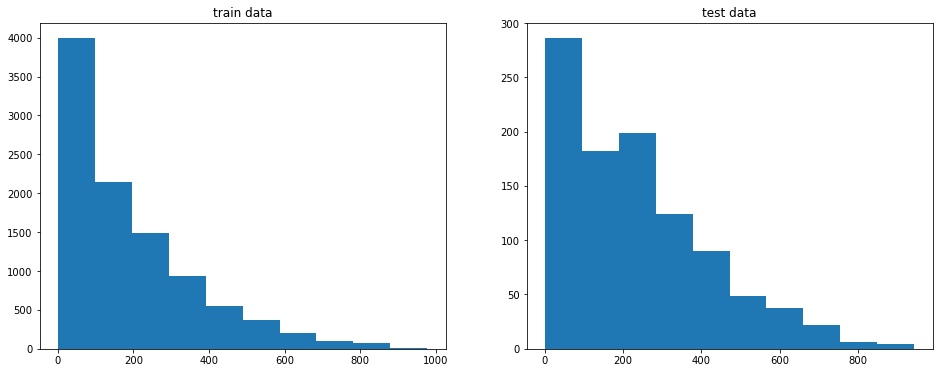

In [16]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data');

#### Числовые признаки

In [17]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [18]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [19]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [20]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


### Модель

In [21]:
regressor = linear_model.SGDRegressor(random_state=0)

In [22]:
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

32678333066101.656

In [23]:
test_labels[:10]

array([525, 835, 355, 222, 228, 325, 328, 308, 346, 446], dtype=int64)

In [24]:
regressor.predict(test_data)[:10]

array([-8.15217468e+13, -1.27940348e+14, -5.15430820e+13, -2.29149119e+13,
       -2.58255957e+13, -3.85635403e+13, -3.92648763e+13, -3.03104198e+13,
       -4.03846575e+13, -5.57515848e+13])

In [25]:
regressor.coef_

array([-2.30285477e+10, -5.87204402e+08, -1.27291755e+10, -1.27359409e+09,
        5.83730183e+10, -1.60478942e+11, -3.67459548e+10, -4.87006373e+09])

In [26]:
regressor.intercept_

array([2.37153196e+10])

### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
#создаем стандартный scaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [29]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

0.042930483012408885

In [30]:
test_labels[:10]

array([525, 835, 355, 222, 228, 325, 328, 308, 346, 446], dtype=int64)

In [31]:
regressor.predict(scaled_test_data)[:10]

array([524.90958201, 834.88816062, 354.94091402, 221.96933203,
       227.95283001, 324.96044934, 327.966113  , 307.98463956,
       345.96942383, 445.96231877])

### Подозрительно хорошо?

In [32]:
regressor.coef_

array([ 4.58902678e-01, -4.51836158e-01,  6.62608792e-04, -1.40703258e-02,
        5.08590377e+01,  1.48008168e+02, -1.32281341e-03,  7.59230341e-03])

In [33]:
print(list(map(lambda x : round(x, 2), regressor.coef_)))

[0.46, -0.45, 0.0, -0.01, 50.86, 148.01, -0.0, 0.01]


In [34]:
np.round(regressor.intercept_, 2)

array([187.47])

In [35]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [36]:
train_labels[:10]

array([16, 40, 32, 13,  1,  1,  2,  3,  8, 14], dtype=int64)

In [37]:
np.all(train_data.registered + train_data.casual == train_labels)

True

In [38]:
train_data.drop(['casual', 'registered'], axis=1, inplace=True)
test_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [39]:
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [40]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

121.8835371361759

In [41]:
print(list(map(lambda x : round(x, 2), regressor.coef_)))

[30.01, 32.15, -42.28, 3.78, 12.71, 50.06]


In [42]:
np.round(regressor.intercept_, 2)

array([186.54])

### Pipeline

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
# создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps=[('scaling', scaler), ('regression', regressor)])

In [45]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

121.8835371361759

### Подбор параметров

In [46]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__early_stopping', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter_no_change', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__validation_fraction', 'regression__verbose', 'regression__warm_start'])

In [47]:
parameters_grid = {
    'regression__loss': ['epsilon_insensitive', 'squared_loss'],
    'regression__penalty': ['l1', 'l2', 'none'],
    'regression__alpha': [0.0001, 0.01],
    'scaling__with_mean': [0., 0.5],
}

In [48]:
grid_cv = model_selection.GridSearchCV(pipeline, parameters_grid, scoring='neg_mean_absolute_error', cv=4)

In [49]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 8.9 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('regression',
                                        SGDRegressor(random_state=0))]),
             param_grid={'regression__alpha': [0.0001, 0.01],
                         'regression__loss': ['epsilon_insensitive',
                                              'squared_loss'],
                         'regression__penalty': ['l1', 'l2', 'none'],
                         'scaling__with_mean': [0.0, 0.5]},
             scoring='neg_mean_absolute_error')

In [50]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-109.56777816626021
{'regression__alpha': 0.01, 'regression__loss': 'epsilon_insensitive', 'regression__penalty': 'l1', 'scaling__with_mean': 0.0}


### Оценка по отложенному тесту

In [51]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))

134.79035110921586

In [52]:
np.mean(test_labels)

232.159

In [53]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

In [54]:
test_labels[:10]

array([525, 835, 355, 222, 228, 325, 328, 308, 346, 446], dtype=int64)

In [55]:
test_predictions[:10]

array([ 93.9256531 , 111.68774463, 148.29424291, 172.99576742,
       189.44675926, 199.0675237 , 205.09058712, 226.32865479,
       232.79122761, 242.07205945])

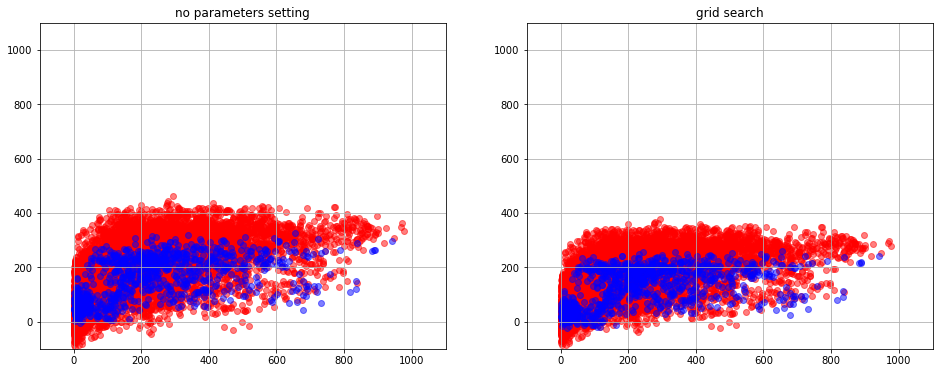

In [56]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1, 2, 1)
pylab.grid(True)
pylab.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color='blue')
pylab.title('no parameters setting')
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100)

pylab.subplot(1, 2, 2)
pylab.grid(True)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color='blue')
pylab.title('grid search')
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100);